**Problem Statement** 

This dataset could be used to train a decision tree regression model that can predict the price of a car based on its age, mileage, engine specifications, paint color, transmission type, number of doors, and weight.

The “TARGET variable in this dataset is the “PRICE” variable on which will be predicted by the decision tree regression.

The rest of the variables are used for training the models.

total Rows(1044)

total columns(10)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


import warnings


In [3]:
#read the file
car_data = pd.read_csv('/content/CarPricesDataset.csv')

In [4]:

#records and columns
car_data.shape

(1044, 10)

In [5]:
car_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000,3,1165
1,13750,23.0,72937,Diesel,90,1,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,1,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0,0,2000,3,1170


In [6]:
car_data.dtypes

Price          int64
Age          float64
KM             int64
FuelType      object
HP             int64
MetColor       int64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
dtype: object

In [7]:
# Convert categorical variables to numerical labels
encoder = LabelEncoder()
car_data['FuelType'] = encoder.fit_transform(car_data['FuelType'])

In [8]:
car_data['CC'] = car_data['CC'].astype(float)
car_data['Weight'] =car_data['Weight'].astype(float)
car_data['Price'] = car_data['Price'].astype(float)

In [9]:
print(car_data['Price'].head())

0    13500.0
1    13750.0
2    13950.0
3    14950.0
4    13750.0
Name: Price, dtype: float64


In [10]:
car_data.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1039,10950.0,59.0,22705,2,110,1,0,1600.0,5,1075.0
1040,9500.0,63.0,22178,2,86,1,0,1300.0,3,1015.0
1041,10900.0,62.0,17345,2,110,1,0,1600.0,3,1050.0
1042,10950.0,67.0,15535,2,86,1,1,1300.0,4,1030.0
1043,9450.0,66.0,15110,2,86,0,0,1300.0,5,1035.0


In [11]:
car_data.dtypes

Price        float64
Age          float64
KM             int64
FuelType       int64
HP             int64
MetColor       int64
Automatic      int64
CC           float64
Doors          int64
Weight       float64
dtype: object

In [12]:
# checking columns
car_data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [13]:
car_data.value_counts()

Price    Age   KM      FuelType  HP   MetColor  Automatic  CC      Doors  Weight
24950.0  8.0   13253   1         116  1         0          2000.0  5      1320.0    2
4350.0   44.0  158320  1         69   0         0          1800.0  5      1110.0    1
11950.0  40.0  179860  1         90   1         0          2000.0  5      1205.0    1
         41.0  51732   2         97   1         0          1400.0  3      1025.0    1
               45287   2         110  1         0          1600.0  5      1075.0    1
                                                                                   ..
9940.0   53.0  60558   2         110  1         0          1600.0  4      1105.0    1
9950.0   37.0  44757   2         97   0         0          1400.0  3      1025.0    1
         42.0  27141   2         97   1         0          1400.0  5      1060.0    1
               105699  2         97   1         0          1400.0  3      1025.0    1
32500.0  4.0   1       1         116  0         0          

In [14]:
#to understand the datatype for each of the variables
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1044 non-null   float64
 1   Age        1042 non-null   float64
 2   KM         1044 non-null   int64  
 3   FuelType   1044 non-null   int64  
 4   HP         1044 non-null   int64  
 5   MetColor   1044 non-null   int64  
 6   Automatic  1044 non-null   int64  
 7   CC         1044 non-null   float64
 8   Doors      1044 non-null   int64  
 9   Weight     1044 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 81.7 KB


In [15]:
print(car_data.nunique())


Price        198
Age           65
KM           928
FuelType       4
HP            11
MetColor       2
Automatic      2
CC            12
Doors          4
Weight        56
dtype: int64


In [16]:
car_data.describe()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1044.000000,1042.000000,1044.000000,1044.000000,1044.000000,1044.00000,1044.000000,1044.000000,1044.000000,1044.000000
mean,11784.138889,48.687140,61365.251916,1.862069,102.146552,0.68295,0.049808,1572.203065,4.073755,1077.860153
std,3692.513760,16.604399,35237.832731,0.389382,15.422791,0.46555,0.217653,184.208246,0.953030,57.435491
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.00000,0.000000,1300.000000,2.000000,1000.000000
25%,9450.000000,39.000000,36635.000000,2.000000,97.000000,0.00000,0.000000,1400.000000,3.000000,1043.750000
50%,10750.000000,53.500000,57061.500000,2.000000,110.000000,1.00000,0.000000,1600.000000,4.000000,1070.000000
75%,12950.000000,62.000000,78170.000000,2.000000,110.000000,1.00000,0.000000,1600.000000,5.000000,1100.000000
max,32500.000000,68.000000,243000.000000,3.000000,192.000000,1.00000,1.000000,2000.000000,5.000000,1615.000000


In [17]:
# one hot encoder
FuelType_dummies = pd.get_dummies(prefix='Fue',data=car_data,columns=['FuelType'])

In [18]:
label_df = FuelType_dummies.head()
label_df

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fue_0,Fue_1,Fue_2,Fue_3
0,13500.0,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0,0
1,13750.0,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0,0
2,13950.0,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0,0
3,14950.0,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0,0
4,13750.0,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0,0


In [19]:
FuelType_dummies = pd.get_dummies(prefix='Fue',data=car_data,columns=['FuelType'])
df_train = FuelType_dummies
df_train.head(5)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fue_0,Fue_1,Fue_2,Fue_3
0,13500.0,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0,0
1,13750.0,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0,0
2,13950.0,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0,0
3,14950.0,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0,0
4,13750.0,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0,0


In [20]:
car_data['CC']=car_data['CC'].fillna(0)
car_data['Age']=car_data['Age'].fillna(0)
car_data['Weight']=car_data['Weight'].fillna(0)
car_data['FuelType']=car_data['FuelType'].fillna(0)

In [21]:
car_data.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

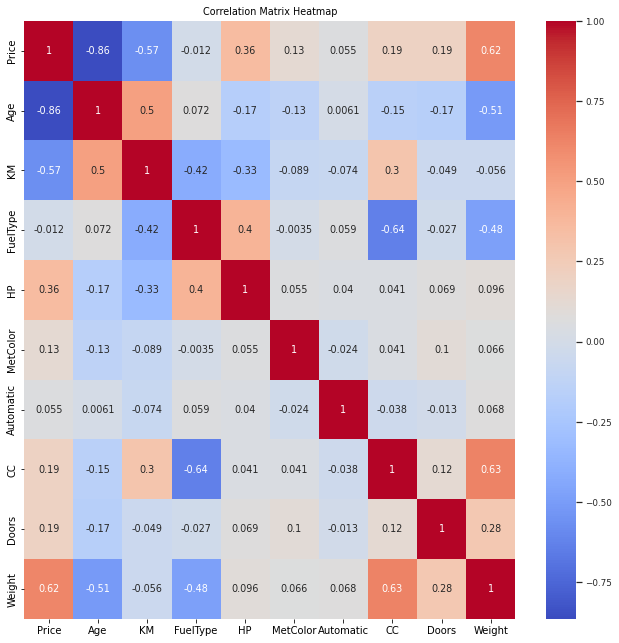

In [22]:
corr_matrix = car_data.corr()
# Set the figure size
plt.subplots(figsize=(11, 11))

# Create a heatmap of the correlation matrix
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
car_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.0,46986,1,90,1,0,2000.0,3,1165.0
1,13750.0,23.0,72937,1,90,1,0,2000.0,3,1165.0
2,13950.0,24.0,41711,1,90,1,0,2000.0,3,1165.0
3,14950.0,26.0,48000,1,90,0,0,2000.0,3,1165.0
4,13750.0,30.0,38500,1,90,0,0,2000.0,3,1170.0


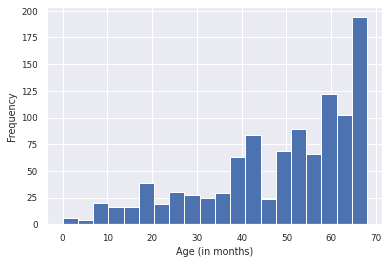

In [24]:
# Histogram of Age:
import matplotlib.pyplot as plt
plt.hist(car_data['Age'], bins=20)
plt.xlabel('Age (in months)')
plt.ylabel('Frequency')
plt.show()

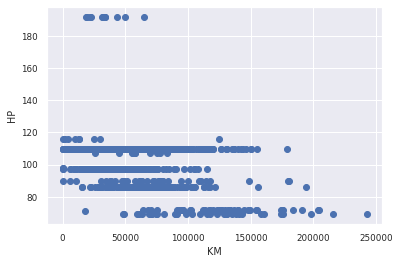

In [25]:
# Scatter plot of KM vs. HP
import matplotlib.pyplot as plt
plt.scatter(car_data['KM'], car_data['HP'])
plt.xlabel('KM')
plt.ylabel('HP')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

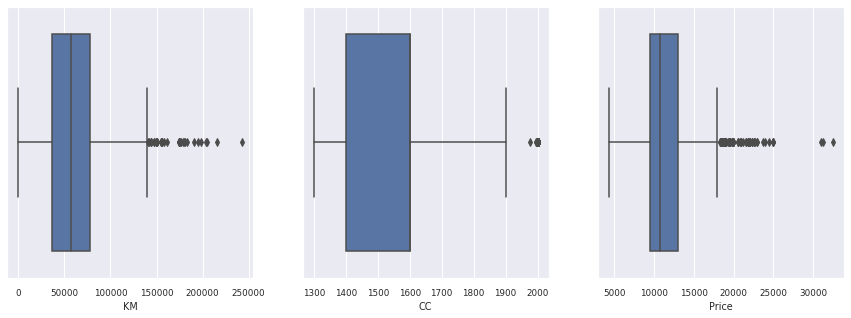

In [26]:
cols = [ 'KM', 'CC', 'Price',]
fig, axs = plt.subplots(ncols=len(cols), figsize=(15,5))
for i, col in enumerate(cols):
    sns.boxplot(x=car_data[col], ax=axs[i])
plt.show

In [27]:

Q1 = car_data[['KM','Price']].quantile(0.25)
Q3 = car_data[['KM','Price']].quantile(0.75)
print('Q1',Q1)
print('Q3',Q3)

Q1 KM       36635.0
Price     9450.0
Name: 0.25, dtype: float64
Q3 KM       78170.0
Price    12950.0
Name: 0.75, dtype: float64


In [28]:
IQR  = Q3 - Q1
print('IQR',round(IQR,2))

IQR KM       41535.0
Price     3500.0
dtype: float64


In [29]:
lower_limit = Q1 - 1.5 * IQR 
upper_limit = Q3 + 1.5 * IQR

In [30]:
car_data = car_data[~((car_data.loc[:,['KM','Price']] < lower_limit) | (car_data.loc[:,['KM','Price']] > upper_limit)).any(axis=1)]

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X = car_data.iloc[:, :-1] # Features
y = car_data.iloc[:, -1] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# Feature selection using chi-square algorithm
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(3,'Score'))

   Specs         Score
2     KM  2.036210e+06
0  Price  2.195560e+05
7     CC  9.932888e+03


In [36]:
# Train the decision tree regression model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [38]:

# Calculate the R^2 scores of the model on the training and test sets
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

In [39]:
print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Training accuracy: 1.0
Test accuracy: 0.8431109198673015


In [43]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

In [44]:
# Create a Decision Tree Regression model
dtree_reg = DecisionTreeRegressor()


In [45]:
# Apply Grid Search Cross Validation to find the best hyperparameters for the model
grid_search = GridSearchCV(dtree_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42]})

In [46]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_search.best_score_))


Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}
Best Mean Cross-validation score: 0.72


In [47]:
model = DecisionTreeRegressor(criterion="absolute_error", max_depth=5)
model.fit(X_train, y_train)


DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [48]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [49]:

# Calculate the R^2 scores of the model on the training and test sets
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

In [50]:
print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Training accuracy: 0.6049597399220799
Test accuracy: 0.8406585650236664


In [40]:
from scipy.stats import chi2_contingency


In [41]:
# You can also calculate the accuracy as the percentage of correct predictions
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy using chi-square: ", accuracy)

Accuracy using chi-square:  0.5513513513513514
